In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
#from keras.wrappers.scikit_learn import KerasRegressor

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
import datetime as dt
import yfinance as yf

import pandas_datareader.data as web


C:\Users\gusta\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [6]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

start, end = dt.datetime(2010,1,1), dt.datetime(2024,2,14)
#stk_data = web.DataReader(stk_tickers, 'yahoo', start=start, end=end)
stk_data = yf.download(stk_tickers, start=start, end=end)
ccy_data = web.DataReader(ccy_tickers, 'fred', start=start, end=end)
idx_data = web.DataReader(idx_tickers, 'fred', start=start, end=end)

[*********************100%%**********************]  3 of 3 completed


In [7]:
stk_data[('Adj Close', 'MSFT')]

Date
2010-01-04     23.474916
2010-01-05     23.482504
2010-01-06     23.338394
2010-01-07     23.095680
2010-01-08     23.254965
                 ...    
2024-02-07    414.049988
2024-02-08    414.109985
2024-02-09    420.549988
2024-02-12    415.260010
2024-02-13    406.320007
Name: (Adj Close, MSFT), Length: 3552, dtype: float64

In [9]:
return_period = 5
Y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).shift(-return_period)

In [10]:
Y

Date
2010-01-04   -0.022216
2010-01-05   -0.029168
2010-01-06   -0.013744
2010-01-07    0.016610
2010-01-08    0.006502
                ...   
2024-02-07         NaN
2024-02-08         NaN
2024-02-09         NaN
2024-02-12         NaN
2024-02-13         NaN
Name: (Adj Close, MSFT), Length: 3552, dtype: float64

In [11]:
Y.name = Y.name[-1]+'_pred'
Y


Date
2010-01-04   -0.022216
2010-01-05   -0.029168
2010-01-06   -0.013744
2010-01-07    0.016610
2010-01-08    0.006502
                ...   
2024-02-07         NaN
2024-02-08         NaN
2024-02-09         NaN
2024-02-12         NaN
2024-02-13         NaN
Name: MSFT_pred, Length: 3552, dtype: float64

In [12]:
X1 = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]).diff(return_period)
X1.columns = X1.columns.droplevel()
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)
X1

Ticker,GOOGL,IBM
Date,,
2010-01-04,NaN,NaN
2010-01-05,NaN,NaN
2010-01-06,NaN,NaN
2010-01-07,NaN,NaN
2010-01-08,NaN,NaN
...,...,...
2024-02-07,0.038094,0.000436
2024-02-08,0.033096,-0.004608
2024-02-09,0.045447,0.012032


In [15]:
X3

,SP500,DJIA,VIXCLS
DATE,,,
2010-01-01,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN
...,...,...,...
2024-02-07,0.030368,0.013721,-0.111964
2024-02-08,0.018522,0.005346,-0.081785
2024-02-09,0.013620,0.000447,-0.068735


In [16]:

X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(i) \
for i in [return_period, return_period*3,\
return_period*6, return_period*12]], axis=1).dropna()
X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']


In [17]:
X4

,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,,
2010-03-31,-0.012216,0.010985,0.024189,-0.050461
2010-04-01,-0.028733,-0.000686,0.006537,-0.055233
2010-04-05,-0.013236,0.000000,0.017230,-0.045312
2010-04-06,-0.009166,0.001024,0.020328,-0.033151
2010-04-07,-0.014209,-0.000681,0.035372,-0.039001
...,...,...,...,...
2024-02-07,0.040591,0.061200,0.100181,0.139995
2024-02-08,0.025261,0.050111,0.100113,0.115548
2024-02-09,0.022435,0.053429,0.117120,0.139101


In [18]:

X = pd.concat([X1, X2, X3, X4], axis=1)

dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]


In [20]:
dataset.head()

,MSFT_pred,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2014-02-21,0.008652,0.003237,0.005211,0.008703,-0.006354,-0.001295,-0.003168,0.078625,0.017260,0.037403,0.067700,0.018324
2014-03-03,0.001058,-0.008132,0.004406,-0.010599,0.004257,-0.001018,-0.002416,0.117236,0.002385,0.040296,0.031310,-0.006461
2014-03-10,0.006063,0.007356,0.011493,0.018281,-0.004738,0.016890,0.015384,-0.119347,0.001058,0.012773,0.034539,-0.000168
2014-03-17,0.062401,-0.016201,-0.003117,-0.015719,0.000721,-0.009818,-0.010498,0.096590,0.006063,0.009506,0.013005,0.048512
2014-03-24,0.012026,-0.029083,0.013046,0.005789,-0.009295,-0.000748,0.001812,-0.035799,0.062401,0.069522,0.109818,0.095695


In [21]:
correlation = dataset.corr()


<AxesSubplot:title={'center':'Correlation Matrix'}>

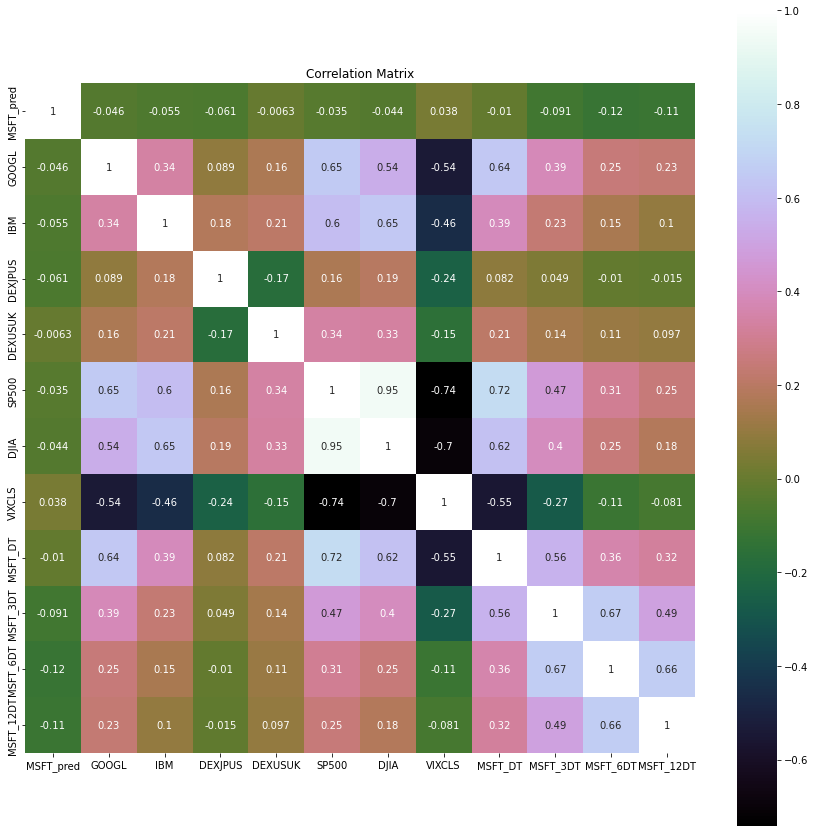

In [23]:
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')


In [24]:
validation_size = 0.2
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [28]:
Y_train
num_folds = 10
scoring = 'neg_mean_squared_error'

In [29]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [30]:
models.append(('MLP', MLPRegressor()))
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [ ]:
names = []
kfold_results = []
test_results = []
train_results = []

In [ ]:
for name, model in models:
    names.append(name)
    ## k-fold analysis:
    kfold = KFold(n_splits=num_folds)
    #converted mean squared error to positive. The lower the better
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, \
      scoring=scoring)
    kfold_results.append(cv_results)
    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)

ValueError: The number of FixedLocator locations (22), usually from a call to set_ticks, does not match the number of ticklabels (23).

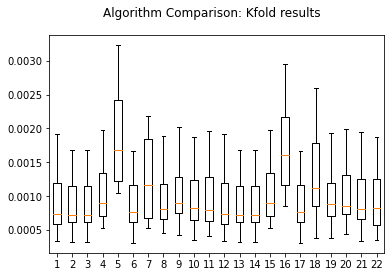

In [38]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (23,) and arg 1 with shape (22,).

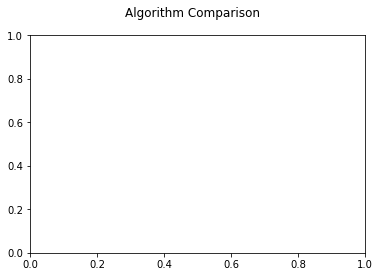

In [39]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()